In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
train=pd.read_csv("train_loan_prediction.csv")
test=pd.read_csv("test_loan_prediction.csv")
train_original=train.copy()
test_original=test.copy()

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [35]:
train.shape

(614, 13)

In [36]:
test.shape

(367, 12)

In [24]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [23]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

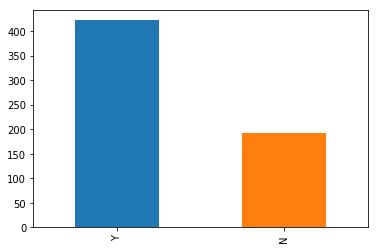

In [47]:
#loan_status analysis,target variable
train['Loan_Status'].value_counts().plot.bar() 

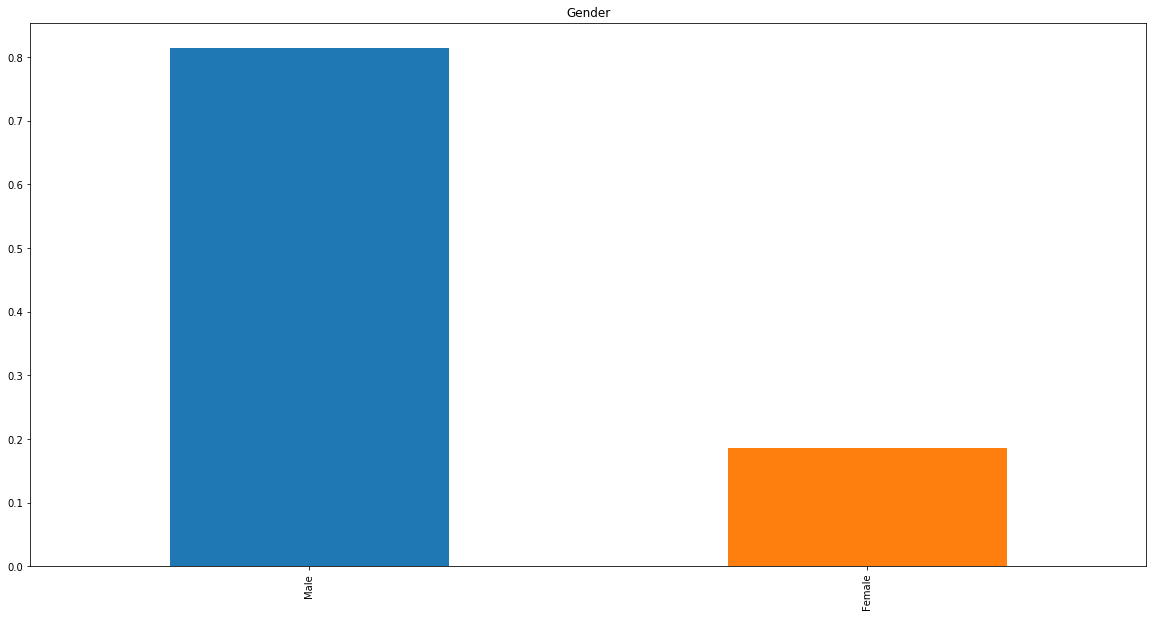

In [46]:
#gender analysis
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 

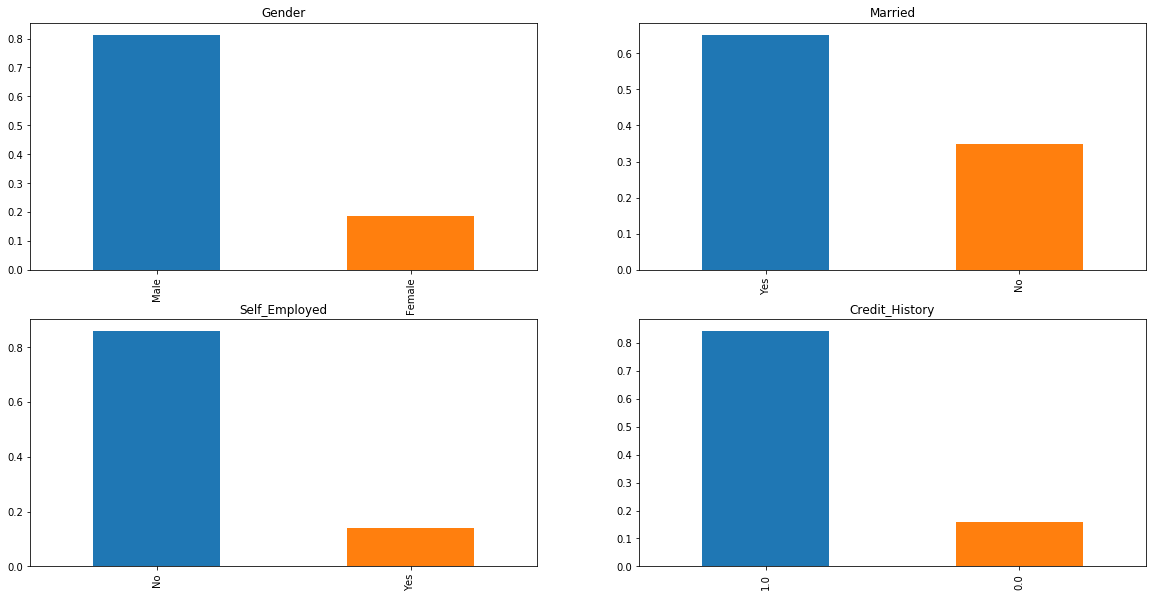

In [45]:
#categorical variables analysis
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

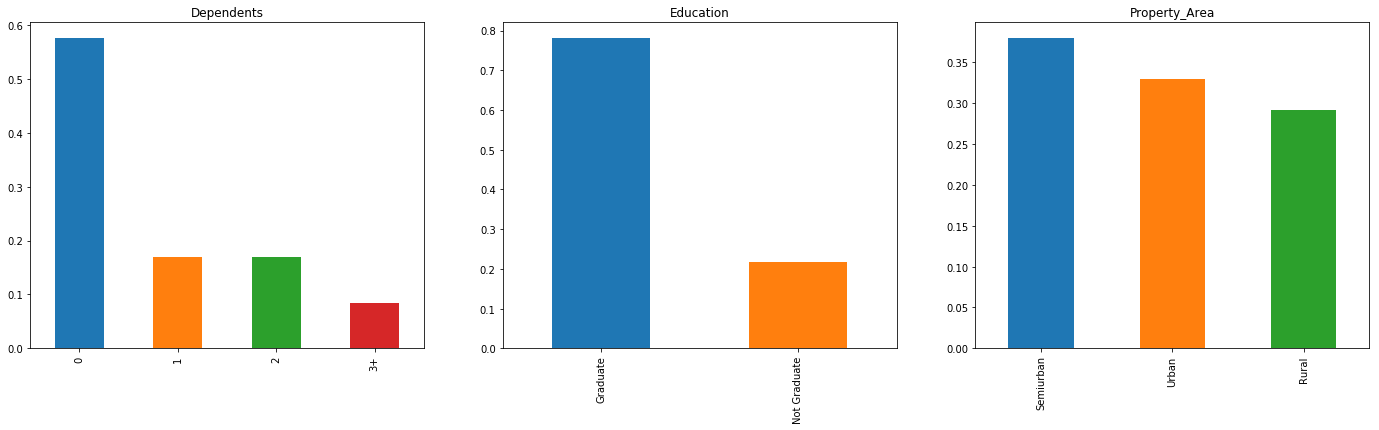

In [51]:
#Ordinal variables analysis 
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

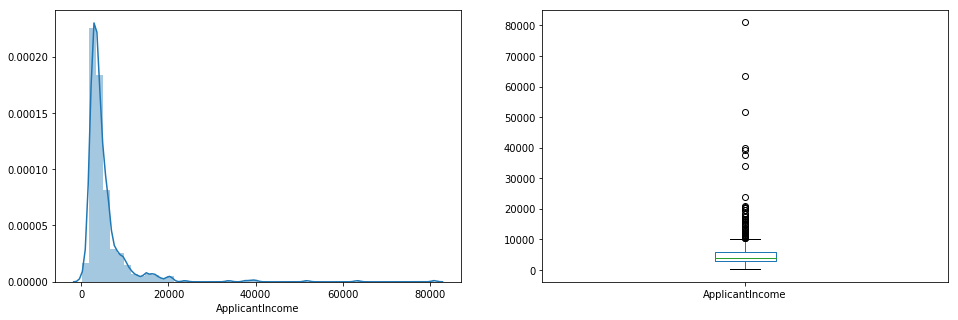

In [50]:
#Numerical variable analysis applicant income
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5,0.98,'')

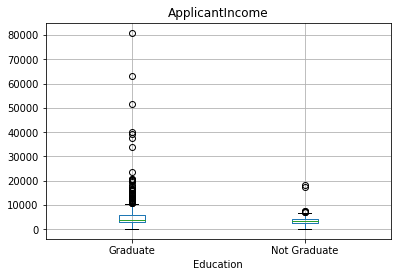

In [52]:
#Numerical variable analysis applicant income, Education
train.boxplot(column='ApplicantIncome', by= 'Education')
plt.suptitle("")

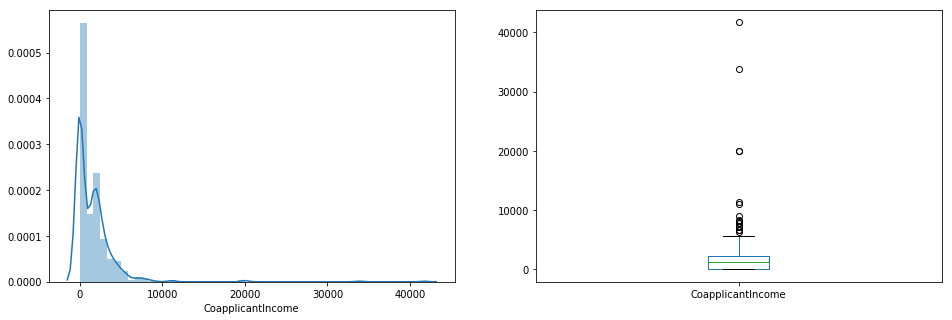

In [53]:
#Numerical variable analysis coapplicant income
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

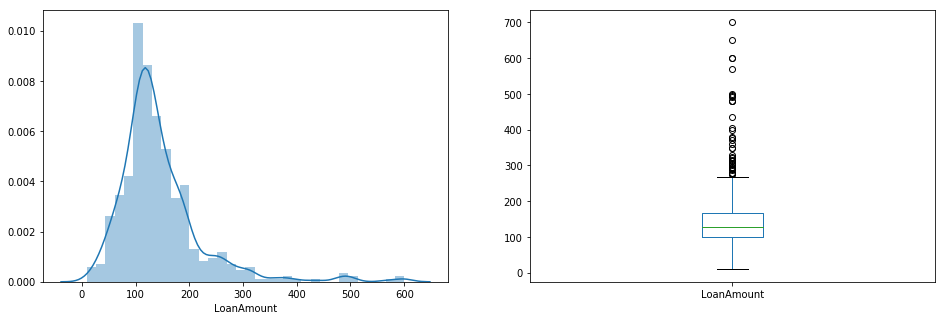

In [33]:
#Numerical variable analysis of loan amount variable 
plt.figure(1)
plt.subplot(121)
train_df=train.dropna()
sns.distplot(train_df['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

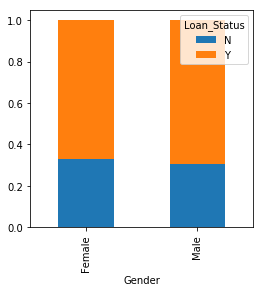

In [32]:
#Visualize loan gender vs loan status
Gender=pd.crosstab(train['Gender'],
train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),
axis=0).plot(kind="bar",
stacked=True,
figsize=(4,4))

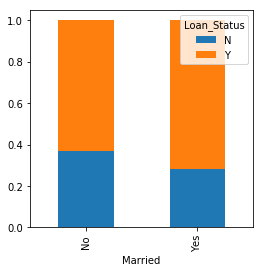

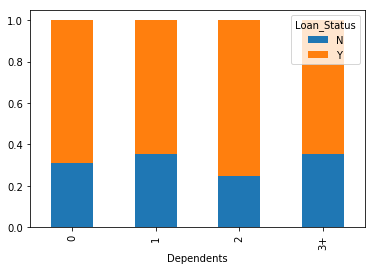

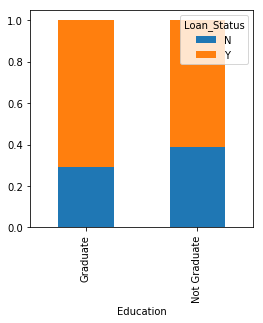

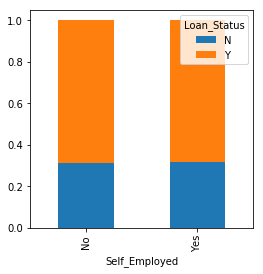

In [39]:
#Bivariate Analysis of Target variable and indendent Categorical Variables
Married=pd.crosstab(train['Married'],
train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],
train['Loan_Status'])
Education=pd.crosstab(train['Education'],
train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],
train['Loan_Status'])
Married.div(Married.sum(1).astype(float),
axis=0).plot(kind="bar",
stacked=True,
figsize=(4,4)) 
plt.show()
Dependents.div(Dependents.sum(1).astype(float),
axis=0).plot(kind="bar",
stacked=True)
plt.show()
Education.div(Education.sum(1).astype(float),
axis=0).plot(kind="bar",
stacked=True,
figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),
axis=0).plot(kind="bar",
stacked=True,
figsize=(4,4))
plt.show()

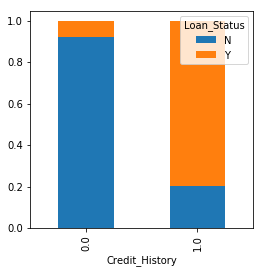

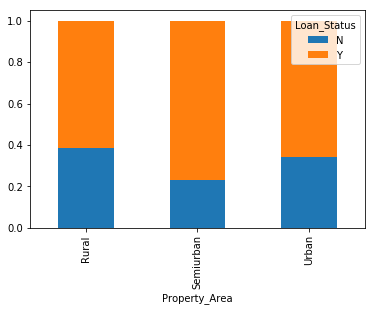

In [13]:
#Bivariate Analysis of Target variable and remaining indendent Categorical Variables
Credit_History=pd.crosstab(train['Credit_History'],
train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],
train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),
axis=0).plot(kind="bar",
stacked=True,
figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),
axis=0).plot(kind="bar", 
stacked=True)
plt.show()

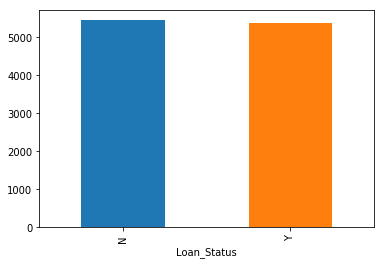

In [15]:
#Numerical Independent Variable vs Target Variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

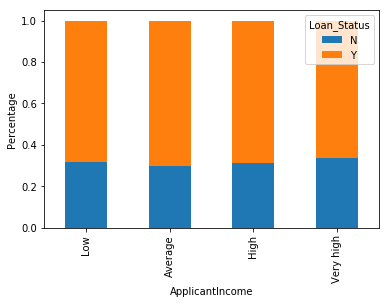

In [14]:
#Numerical Independent Variable vs Target Variable
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],
bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],
train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),
axis=0).plot(kind="bar",
stacked=True)
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

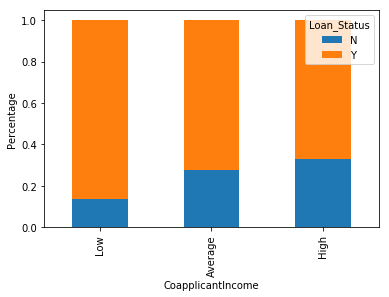

In [18]:
#Numerical Independent Variable vs Target Variable
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],
bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],
train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),
axis=0).plot(kind="bar",
stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

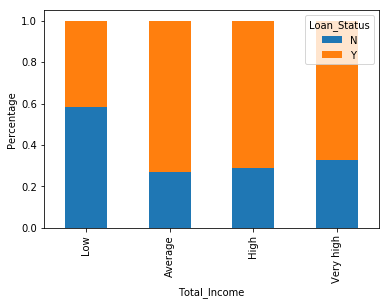

In [20]:
#Combined Numerical Independent Variable vs Target Variable
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),
axis=0).plot(kind="bar",
stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

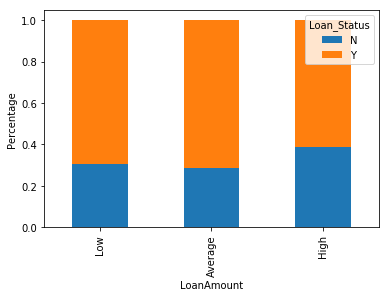

In [21]:
#Numerical Independent Variable vs Target Variable
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],
train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),
axis=0).plot(kind="bar",
stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

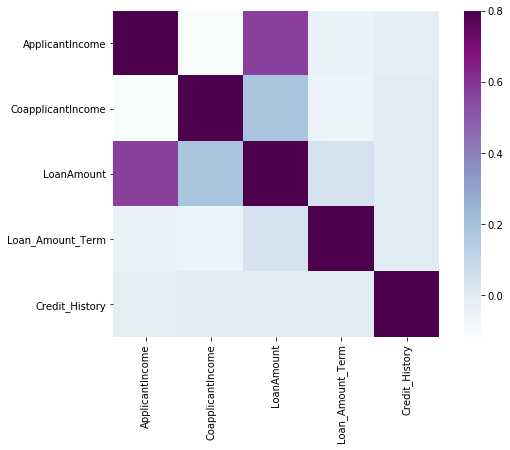

In [45]:
matrix = train_original.corr() 
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix,
vmax=.8,
square=True,
cmap="BuPu");

In [3]:
# Missing value imputation, count of missing values.
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [8]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [21]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [12]:
#all null values have been filled
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [15]:
#all null values have been filled
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

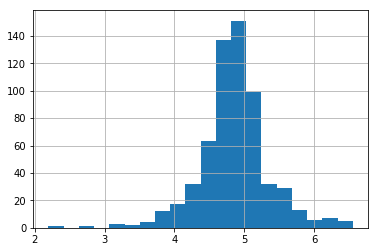

In [92]:
# visualize the effect of log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [23]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [24]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [25]:
#make dummy variables for the categorical variables
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [27]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
#predict the Loan_Status for validation set and calculate its accuracy
pred_cv = model.predict(x_cv)

In [14]:
#calculate how accurate our predictions are
accuracy_score(y_cv,pred_cv)

0.8432432432432433

In [29]:
#predictions for the test dataset
pred_test = model.predict(test)

In [30]:
submission=pd.read_csv ("sample_submission.csv")

In [31]:
submission['Loan_Status']=pred_test

In [32]:
submission['Loan_ID']=test_original['Loan_ID']

In [33]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [34]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [35]:
# import StratifiedKFold from sklearn and fit the model.
from sklearn.model_selection import StratifiedKFold

In [19]:
#cross validation logistic model with stratified 5 folds and make predictions for test dataset
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.8032786885245902


In [20]:
yvl.replace('Y', 1, inplace=True)
yvl.replace('N', 0, inplace=True)

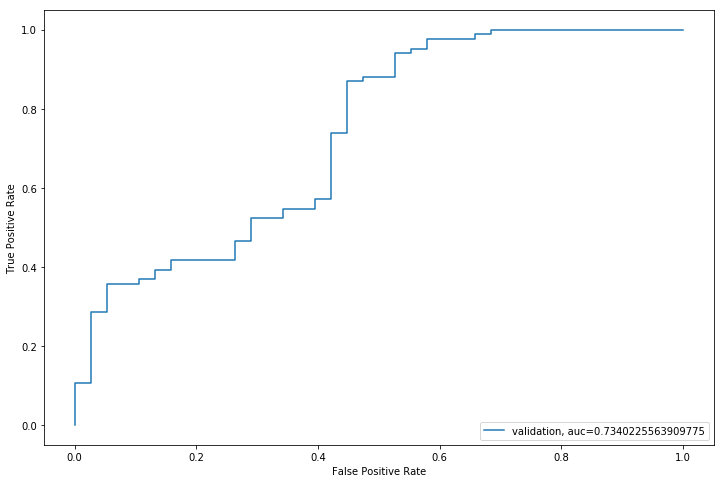

In [24]:
#visualize the roc curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [25]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [26]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [27]:
pd.DataFrame(submission, columns=['Loan_ID',
'Loan_Status']).to_csv('logistic.csv')

In [28]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

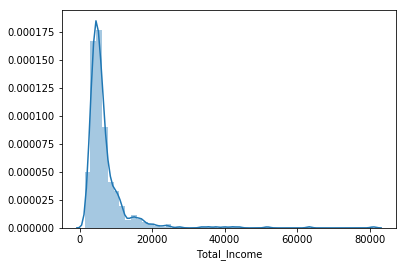

In [29]:
#check the distribution of Total Income
sns.distplot(train['Total_Income']);

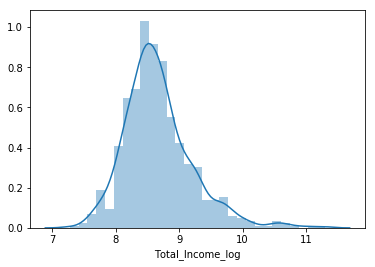

In [30]:
#log transformation to make the distribution normal.
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

In [31]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

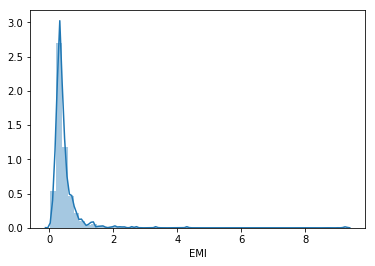

In [32]:
#distribution of EMI variable
sns.distplot(train['EMI']);

In [33]:
#sns.distplot(train['EMI']);
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
#sns.distplot(train['Balance Income']);

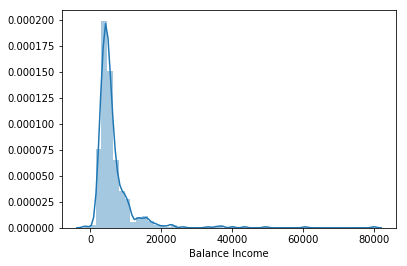

In [34]:
sns.distplot(train['Balance Income']);

In [35]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [42]:
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y): 
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)  
    i+=1 
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.8032786885245902


In [43]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions 
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [44]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [45]:
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

In [21]:
from sklearn import tree

In [59]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+1


1 of kfold 5
accuracy_score 0.7073170731707317

1 of kfold 5
accuracy_score 0.6991869918699187

1 of kfold 5
accuracy_score 0.7154471544715447

1 of kfold 5
accuracy_score 0.7235772357723578

1 of kfold 5
accuracy_score 0.680327868852459


In [54]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [55]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)


1 of kfold 5
accuracy_score 0.8048780487804879

1 of kfold 5
accuracy_score 0.8373983739837398

1 of kfold 5
accuracy_score 0.7886178861788617

1 of kfold 5
accuracy_score 0.8130081300813008

1 of kfold 5
accuracy_score 0.7459016393442623


In [1]:
from sklearn.model_selection import GridSearchCV

In [2]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [ ]:
# Fit the grid search model
grid_search.fit(x_train,y_train)

In [ ]:
# Estimating the optimized value 
grid_search.best_estimator_

In [34]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)  
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+1
pred_test = model.predict(test) 
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

1 of kfold 5
accuracy_score 0.8211382113821138

1 of kfold 5
accuracy_score 0.7967479674796748

1 of kfold 5
accuracy_score 0.8130081300813008

1 of kfold 5
accuracy_score 0.7950819672131147


In [26]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions 
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [27]:
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [28]:
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv')

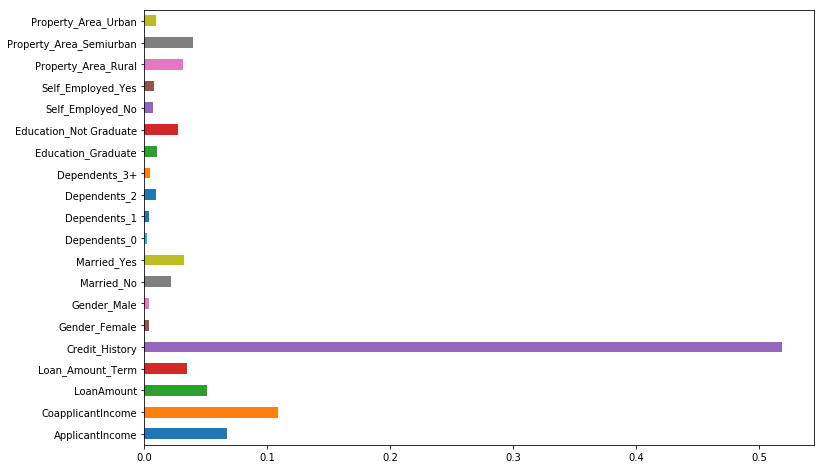

In [35]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [36]:
from xgboost import XGBClassifier

In [37]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = XGBClassifier(n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+1
    pred_test = model.predict(test)
    pred3=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

1 of kfold 5
accuracy_score 0.8211382113821138

1 of kfold 5
accuracy_score 0.7967479674796748

1 of kfold 5
accuracy_score 0.7886178861788617

1 of kfold 5
accuracy_score 0.8032786885245902


In [39]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [40]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [41]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')